# Midterm Project

Initial Questions
<br>
- Super charger vs turbo charger advantages
- Fuel Efficiency of each equipped
- Type/Cost of car equipped
- Emissions of cars equipped
- Vehicle Class
- Engine Displacement
- Fuel used in a year


<Br>




## Column names/Meaning
- enginetype - type of charger equipped
- sCharger - if S, this vehicle is supercharged
- tCharger - if T, this vehicle is turbocharged
- city08 - d city MPG for fuelType1 (2), (11)
- highway08 - highway MPG for fuelType1 (2), (11)
- make - manufacturer (division)
- model - model name (carline)
- VClass - EPA vehicle size class
- fuelType1 - fuel type 1. For single fuel vehicles, this will be the only fuel. For dual fuel vehicles, this will be the conventional fuel.
- co2TailpipeGpm - tailpipe CO2 in grams/mile for fuelType1 (5)
- displ - engine displacement in liters
- barrels08 - annual petroleum consumption in barrels for fuelType1 (1)
- cylinders - number of cylinders


In [1]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale, StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline 
import seaborn as sns
import numpy as np # need this for numpy arrays
import pandas as pd # main focus of this Notebook!
import matplotlib.pyplot as plt
cars = pd.read_csv('cars.csv')
cars.shape
cars.head()

,Sum of city08
0,759972


Creates a copy with desired variables


In [2]:
cars2 =  cars[['sCharger', 'tCharger', 'city08', 'highway08', 'make', 'model', 'VClass', 'fuelType1', 'co2TailpipeGpm', 'displ','barrels08', 'cylinders']].copy()
cars2.head()

cars2.count()


KeyError: "None of [Index(['sCharger', 'tCharger', 'city08', 'highway08', 'make', 'model',\n       'VClass', 'fuelType1', 'co2TailpipeGpm', 'displ', 'barrels08',\n       'cylinders'],\n      dtype='object')] are in the [columns]"

Drops observations of cars with neither a turbo or supercharger

In [1417]:
cars2 = cars2.drop(cars2[(cars2.sCharger != 'S') & (cars2.tCharger != 'T')].index)

cars2.head()


,sCharger,tCharger,city08,highway08,make,model,VClass,fuelType1,co2TailpipeGpm,displ,barrels08,cylinders,enginetype


Replaces NaN values with 0
<br>
Replaces observations marked "S" or "T"  a boolean. 1=True


In [1216]:
cars2['sCharger'].fillna(0, inplace=True)
cars2['tCharger'].fillna(0, inplace=True)

cars2.sCharger[cars2.sCharger == 'S'] = 1
cars2.tCharger[cars2.tCharger == 'T'] = 1
cars2.head()

/Users/KyleMontera/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/KyleMontera/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,sCharger,tCharger,city08,highway08,make,model,VClass,fuelType1,co2TailpipeGpm,displ,barrels08,cylinders
4,0,1,17,23,Subaru,Legacy AWD Turbo,Compact Cars,Premium Gasoline,467.736842,2.2,17.347895,4.0
61,1,0,15,21,Ford,Thunderbird,Midsize Cars,Premium Gasoline,522.764706,3.8,19.388824,6.0
62,1,0,15,22,Ford,Thunderbird,Midsize Cars,Premium Gasoline,493.722222,3.8,18.311667,6.0
100,0,1,10,15,Rolls-Royce,Turbo R/Turbo R(lwb),Midsize Cars,Premium Gasoline,807.909091,6.8,29.964545,8.0
115,0,1,17,22,Volvo,940,Midsize Cars,Regular Gasoline,467.736842,2.3,17.347895,4.0


Creates a new column, "engine type"

In [1217]:

cars2.loc[cars2.sCharger == 1, 'enginetype'] = 'Super' 
cars2.loc[cars2.tCharger == 1, 'enginetype'] = 'Turbo'
cars2.loc[(cars2.tCharger == 1) & (cars2.sCharger == 1), 'enginetype'] = 'Twin'
cars2.head()


,sCharger,tCharger,city08,highway08,make,model,VClass,fuelType1,co2TailpipeGpm,displ,barrels08,cylinders,enginetype
4,0,1,17,23,Subaru,Legacy AWD Turbo,Compact Cars,Premium Gasoline,467.736842,2.2,17.347895,4.0,Turbo
61,1,0,15,21,Ford,Thunderbird,Midsize Cars,Premium Gasoline,522.764706,3.8,19.388824,6.0,Super
62,1,0,15,22,Ford,Thunderbird,Midsize Cars,Premium Gasoline,493.722222,3.8,18.311667,6.0,Super
100,0,1,10,15,Rolls-Royce,Turbo R/Turbo R(lwb),Midsize Cars,Premium Gasoline,807.909091,6.8,29.964545,8.0,Turbo
115,0,1,17,22,Volvo,940,Midsize Cars,Regular Gasoline,467.736842,2.3,17.347895,4.0,Turbo


Creates a data frame without the sCharger and tCharger columns, replaced by "enginetype"

In [1218]:
engtype = cars2[['enginetype', 'city08', 'highway08', 'make', 'model', 'VClass', 'fuelType1', 'co2TailpipeGpm', 'displ','barrels08', 'cylinders']].copy()

engtype.head()

,enginetype,city08,highway08,make,model,VClass,fuelType1,co2TailpipeGpm,displ,barrels08,cylinders
4,Turbo,17,23,Subaru,Legacy AWD Turbo,Compact Cars,Premium Gasoline,467.736842,2.2,17.347895,4.0
61,Super,15,21,Ford,Thunderbird,Midsize Cars,Premium Gasoline,522.764706,3.8,19.388824,6.0
62,Super,15,22,Ford,Thunderbird,Midsize Cars,Premium Gasoline,493.722222,3.8,18.311667,6.0
100,Turbo,10,15,Rolls-Royce,Turbo R/Turbo R(lwb),Midsize Cars,Premium Gasoline,807.909091,6.8,29.964545,8.0
115,Turbo,17,22,Volvo,940,Midsize Cars,Regular Gasoline,467.736842,2.3,17.347895,4.0


# Charged Car analysis



# Features

In [1394]:
#CityEmission_ratio - City C02 Tailpipe emissions per mile (Grams Per gallon)
#Tailpipe emissions divided by city MPG
engtype['CityEmission_ratio'] = engtype['co2TailpipeGpm'] / engtype['city08']

In [1395]:
#HighwayEmission_ratio - Highway C02 Tailpipe emissions per mile (Grams Per gallon)
#Tailpipe emissions divided by Highway MPG
engtype['HighwayEmission_ratio'] = engtype['co2TailpipeGpm'] / engtype['highway08']



In [1381]:
#GallonsPerYear - Gallons of fuel consumed a year
#Barrels of Petroleum consumptumption pery year multiplied by 42
engtype['GallonsPerYear'] = engtype['barrels08'] * 42

In [1222]:
#Avgmpg
#Average of City and Highway MPG
engtype['avgmpg'] = (engtype['city08'] + engtype['highway08']) / 2

In [1223]:
#Avg_emissionratio
#Average of CityEmission_ratio and HighwayEmission_ratio

engtype['avg_emissionratio'] = (engtype['CityEmission_ratio'] + engtype['HighwayEmission_ratio']) / 2

In [1224]:
engtype.head()

,enginetype,city08,highway08,make,model,VClass,fuelType1,co2TailpipeGpm,displ,barrels08,cylinders,CityEmission_ratio,HighwayEmission_ratio,GallonsPerYear,avgmpg,avg_emissionratio
4,Turbo,17,23,Subaru,Legacy AWD Turbo,Compact Cars,Premium Gasoline,467.736842,2.2,17.347895,4.0,27.513932,20.336384,728.611579,20.0,23.925158
61,Super,15,21,Ford,Thunderbird,Midsize Cars,Premium Gasoline,522.764706,3.8,19.388824,6.0,34.850980,24.893557,814.330588,18.0,29.872269
62,Super,15,22,Ford,Thunderbird,Midsize Cars,Premium Gasoline,493.722222,3.8,18.311667,6.0,32.914815,22.441919,769.090000,18.5,27.678367
100,Turbo,10,15,Rolls-Royce,Turbo R/Turbo R(lwb),Midsize Cars,Premium Gasoline,807.909091,6.8,29.964545,8.0,80.790909,53.860606,1258.510909,12.5,67.325758
115,Turbo,17,22,Volvo,940,Midsize Cars,Regular Gasoline,467.736842,2.3,17.347895,4.0,27.513932,21.260766,728.611579,19.5,24.387349


In [1225]:
engtype.corr()

,city08,highway08,co2TailpipeGpm,displ,barrels08,cylinders,CityEmission_ratio,HighwayEmission_ratio,GallonsPerYear,avgmpg,avg_emissionratio
city08,1.000000,0.934162,-0.907436,-0.724475,-0.903548,-0.657638,-0.857356,-0.837385,-0.903548,0.979619,-0.853883
highway08,0.934162,1.000000,-0.896060,-0.662589,-0.892470,-0.582912,-0.832341,-0.868943,-0.892470,0.986802,-0.851603
co2TailpipeGpm,-0.907436,-0.896060,1.000000,0.795559,0.998362,0.711622,0.973578,0.973201,0.998362,-0.916167,0.978649
displ,-0.724475,-0.662589,0.795559,1.000000,0.795581,0.919027,0.806475,0.762854,0.795581,-0.701720,0.793169
barrels08,-0.903548,-0.892470,0.998362,0.795581,1.000000,0.711775,0.971659,0.971250,1.000000,-0.912382,0.976707
cylinders,-0.657638,-0.582912,0.711622,0.919027,0.711775,1.000000,0.732581,0.671191,0.711775,-0.626541,0.711695
CityEmission_ratio,-0.857356,-0.832341,0.973578,0.806475,0.971659,0.732581,1.000000,0.977860,0.971659,-0.857574,0.996416
HighwayEmission_ratio,-0.837385,-0.868943,0.973201,0.762854,0.971250,0.671191,0.977860,1.000000,0.971250,-0.869115,0.992057
GallonsPerYear,-0.903548,-0.892470,0.998362,0.795581,1.000000,0.711775,0.971659,0.971250,1.000000,-0.912382,0.976707
avgmpg,0.979619,0.986802,-0.916167,-0.701720,-0.912382,-0.626541,-0.857574,-0.869115,-0.912382,1.000000,-0.866841


In [1226]:
grouped = engtype.groupby('enginetype')
print( grouped['GallonsPerYear'].agg([np.mean, np.std]))

                  mean         std
enginetype                        
Super       780.444517  147.822092
Turbo       658.630415  150.583228
Twin        591.887396  162.413555


In [1227]:
grouped = engtype.groupby('enginetype')
print( grouped['HighwayEmission_ratio'].agg([np.mean, np.std]))

                 mean       std
enginetype                     
Super       23.654764  9.566689
Turbo       17.193184  8.292387
Twin        14.813696  7.486674


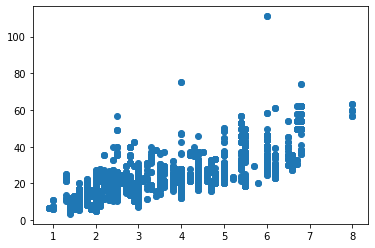

In [1228]:
plt.scatter(engtype.displ, engtype.HighwayEmission_ratio)
plt.show()

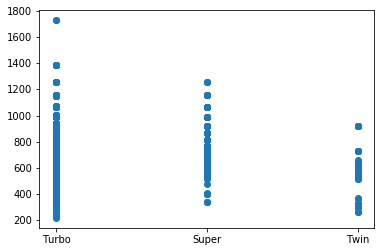

In [1229]:
plt.scatter(engtype.enginetype, engtype.GallonsPerYear)
plt.show()

In [1230]:
grouped = engtype.groupby('enginetype')
print( grouped['cylinders'].agg([np.mean, np.std]))

                mean       std
enginetype                    
Super       6.758448  1.286317
Turbo       5.195249  1.876485
Twin        4.421053  0.822613


In [1231]:
grouped = engtype.groupby('enginetype')
print( grouped['avgmpg'].agg([np.mean, np.std]))


                 mean       std
enginetype                     
Super       19.264080  3.364878
Turbo       23.152331  4.825856
Twin        23.921053  3.724664


In [1232]:
grouped = engtype.groupby('enginetype')
print( grouped['avg_emissionratio'].agg([np.mean, np.std]))

                 mean        std
enginetype                      
Super       28.743100  11.063656
Turbo       20.617639  10.348685
Twin        17.598699   8.644272


# Gallons Per Year Analysis


In [1233]:
df2 = engtype[['GallonsPerYear','CityEmission_ratio']].copy()
df2.head()

,GallonsPerYear,CityEmission_ratio
4,728.611579,27.513932
61,814.330588,34.850980
62,769.090000,32.914815
100,1258.510909,80.790909
115,728.611579,27.513932


In [1234]:
df2.isnull().sum()

GallonsPerYear        0
CityEmission_ratio    0
dtype: int64

# Feature Scaling


In [1235]:
scaler = StandardScaler()

scaler.fit(df2)
scaled_array = scaler.transform(df2)

print(df2.describe())
average = np.mean(scaled_array[:,0])
std = np.std(scaled_array[:,0])
print('\nGallonsPerYear mean is {:.6f}.'.format(average))
print('GallonsPerYear std is {:.6f}.'.format(std))
print('CityEmission_ratio mean is {:.6f}.'.format(np.mean(scaled_array[:,1])))
print('CityEmission_ratio standard deviation is {:.6f}.'.\
      format(np.std(scaled_array[:,1])))

       GallonsPerYear  CityEmission_ratio
count     7762.000000         7762.000000
mean       670.679515           25.022918
std        155.005268           12.870694
min        214.851113            3.729730
25%        573.277500           16.681818
50%        659.220000           23.027778
75%        728.611579           29.233553
max       1730.452500          158.696429

GallonsPerYear mean is -0.000000.
GallonsPerYear std is 1.000000.
CityEmission_ratio mean is -0.000000.
CityEmission_ratio standard deviation is 1.000000.


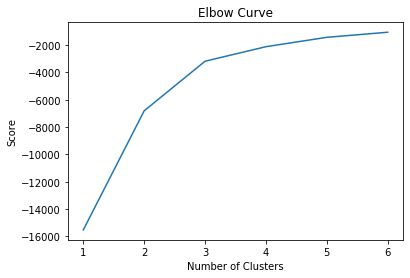

In [1236]:
df = scaled_array
no_clusters = 6


noClusters = range(1,no_clusters + 1)
kmeans = [KMeans(n_clusters = i) for i in noClusters] 
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
plt.plot(noClusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel("Score")
plt.title('Elbow Curve')
plt.show()

In [1237]:
kmeans = KMeans(n_clusters = 3, \
            random_state = 42) # <-- use this number to get my result
kmeans = kmeans.fit(scaled_array)

In [1238]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [1239]:
unscaled = scaler.inverse_transform(kmeans.cluster_centers_)
unscaled

array([[ 731.48852038,   28.51404199],
       [ 548.17679671,   15.95879095],
       [1039.46238774,   58.19498043]])

In [1240]:
centroids = pd.DataFrame({'centroidx':unscaled[:,0],\
            'centroidy':unscaled[:,1]})

In [1241]:
centroids.head()

,centroidx,centroidy
0,731.488520,28.514042
1,548.176797,15.958791
2,1039.462388,58.194980


In [1242]:
df2['labels'] = kmeans.labels_.astype(np.int) # kmeans label_ generates the cluster numbers
df2.head() # look to see which cluster each row is assigned to

,GallonsPerYear,CityEmission_ratio,labels
4,728.611579,27.513932,0
61,814.330588,34.850980,0
62,769.090000,32.914815,0
100,1258.510909,80.790909,2
115,728.611579,27.513932,0


In [1243]:

df2['enginetype'] = engtype['enginetype'] # and the cereal name
df2['enginetype'] = df2['enginetype'].astype(str).str[0:6] # cut to six chars

df2.head()

,GallonsPerYear,CityEmission_ratio,labels,enginetype
4,728.611579,27.513932,0,Turbo
61,814.330588,34.850980,0,Super
62,769.090000,32.914815,0,Super
100,1258.510909,80.790909,2,Turbo
115,728.611579,27.513932,0,Turbo


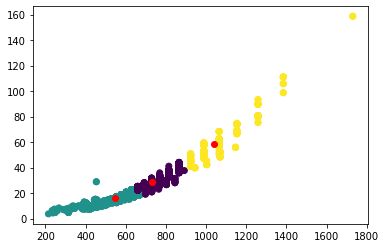

In [1244]:
plt.scatter(df2['GallonsPerYear'], df2['CityEmission_ratio'], c=df2.labels) # (x,y,color)
plt.scatter(centroids['centroidx'], \
            centroids['centroidy'], c='r') # (x,y,color)

plt.show()

In [1245]:
ENGINETYPE_COLOR_MAP = {'Super' : 'Blue',
                   'Turbo' : 'Green',
                  'Twin' : 'Yellow',
                  
                 }
                  

ENGINETYPE_COLOR = [ENGINETYPE_COLOR_MAP[l] for l in df2.enginetype]

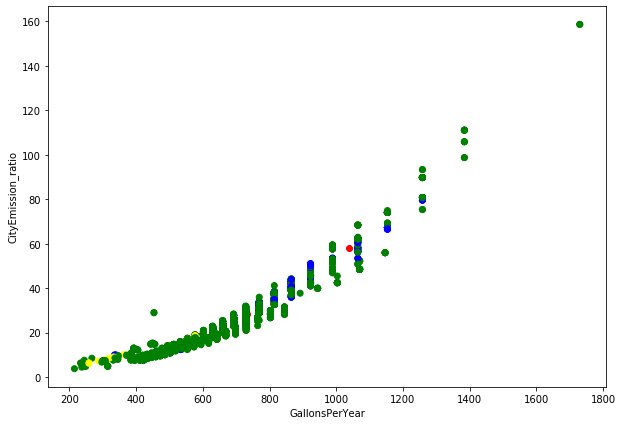

In [1246]:
fig_size = plt.rcParams["figure.figsize"]
 
fig_size[0] = 10
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size
fig, ax = plt.subplots()
plt.scatter(centroids['centroidx'], centroids['centroidy'], c='red') 
plt.xlabel('GallonsPerYear')
plt.ylabel('CityEmission_ratio')
ax.scatter(df2['GallonsPerYear'], df2['CityEmission_ratio'], c=ENGINETYPE_COLOR)
# 'C' OR COLOR CHANGED TO THE 'TYPE_COLOR' VARIABLE, WHICH CHANGES THE COLORS OF THE INDIVIDUAL POINTS REPRESENTING EACH BIRD TYPE TO IT'S RESPECTIVE COLOR


plt.show()

# Engine Displacement vs Highway emissions

In [1247]:
df4 = engtype[['displ','CityEmission_ratio']].copy()
df4.head()

,displ,CityEmission_ratio
4,2.2,27.513932
61,3.8,34.850980
62,3.8,32.914815
100,6.8,80.790909
115,2.3,27.513932


In [1248]:
df4.isnull().sum()

displ                 2
CityEmission_ratio    0
dtype: int64

In [1249]:
df4 = df4.dropna().copy()
df4.isnull().sum()

displ                 0
CityEmission_ratio    0
dtype: int64

In [1250]:
scaler = StandardScaler()

scaler.fit(df4)
scaled_array = scaler.transform(df4)

print(df2.describe())
average = np.mean(scaled_array[:,0])
std = np.std(scaled_array[:,0])
print('\ndispl mean is {:.6f}.'.format(average))
print('displ std is {:.6f}.'.format(std))
print('CityEmission_ratio mean is {:.6f}.'.format(np.mean(scaled_array[:,1])))
print('CityEmission_ratio standard deviation is {:.6f}.'.\
      format(np.std(scaled_array[:,1])))

       GallonsPerYear  CityEmission_ratio       labels
count     7762.000000         7762.000000  7762.000000
mean       670.679515           25.022918     0.620459
std        155.005268           12.870694     0.626465
min        214.851113            3.729730     0.000000
25%        573.277500           16.681818     0.000000
50%        659.220000           23.027778     1.000000
75%        728.611579           29.233553     1.000000
max       1730.452500          158.696429     2.000000

displ mean is -0.000000.
displ std is 1.000000.
CityEmission_ratio mean is 0.000000.
CityEmission_ratio standard deviation is 1.000000.


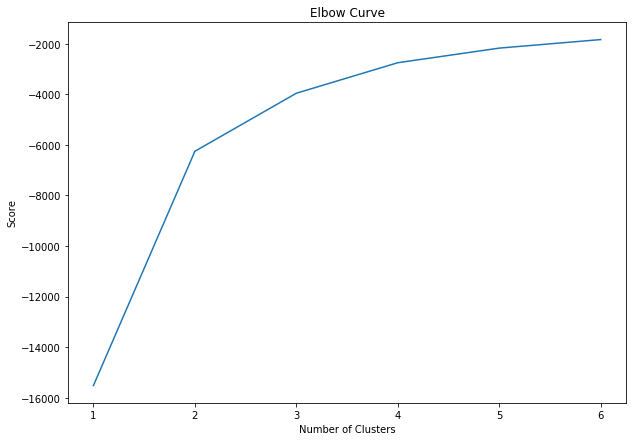

In [1251]:
df3 = scaled_array
no_clusters = 6


noClusters = range(1,no_clusters + 1)
kmeans = [KMeans(n_clusters = i) for i in noClusters] 
score = [kmeans[i].fit(df3).score(df3) for i in range(len(kmeans))]
plt.plot(noClusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel("Score")
plt.title('Elbow Curve')
plt.show()


In [1252]:
kmeans = KMeans(n_clusters = 4, \
            random_state = 42) # <-- use this number to get my result
kmeans = kmeans.fit(scaled_array)

In [1253]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [1254]:
unscaled = scaler.inverse_transform(kmeans.cluster_centers_)
unscaled

array([[ 1.86370177, 15.55330328],
       [ 4.19359806, 34.0409314 ],
       [ 5.97303371, 59.14732443],
       [ 2.65821404, 24.89416467]])

In [1255]:
centroids = pd.DataFrame({'centroidx':unscaled[:,0],\
            'centroidy':unscaled[:,1]})

In [1256]:
df4['labels'] = kmeans.labels_.astype(np.int) # kmeans label_ generates the cluster numbers
df4.head() # look to see which cluster each row is assigned to

,displ,CityEmission_ratio,labels
4,2.2,27.513932,3
61,3.8,34.850980,1
62,3.8,32.914815,1
100,6.8,80.790909,2
115,2.3,27.513932,3


In [1257]:
df4['enginetype'] = engtype['enginetype'] # and the cereal name
df4['enginetype'] = df4['enginetype'].astype(str).str[0:6] # cut to six chars

df4.head()

,displ,CityEmission_ratio,labels,enginetype
4,2.2,27.513932,3,Turbo
61,3.8,34.850980,1,Super
62,3.8,32.914815,1,Super
100,6.8,80.790909,2,Turbo
115,2.3,27.513932,3,Turbo


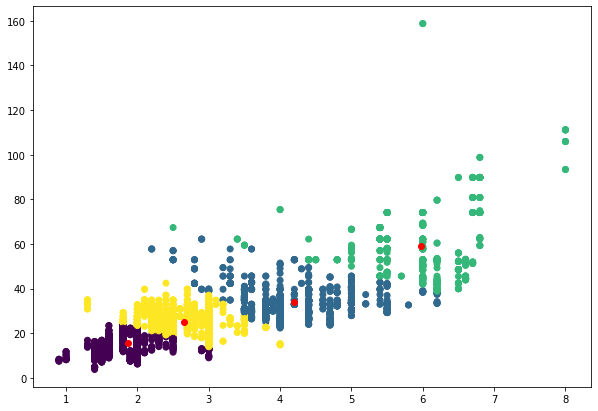

In [1258]:
plt.scatter(df4['displ'], df4['CityEmission_ratio'], c=df4.labels) # (x,y,color)
plt.scatter(centroids['centroidx'], \
            centroids['centroidy'], c='r') # (x,y,color)

plt.show()

In [1259]:
ENGINETYPE_COLOR_MAP = {'Super' : 'Blue',
                   'Turbo' : 'Green',
                  'Twin' : 'Yellow',
                  
                 }
                  

ENGINETYPE_COLOR = [ENGINETYPE_COLOR_MAP[l] for l in df4.enginetype]

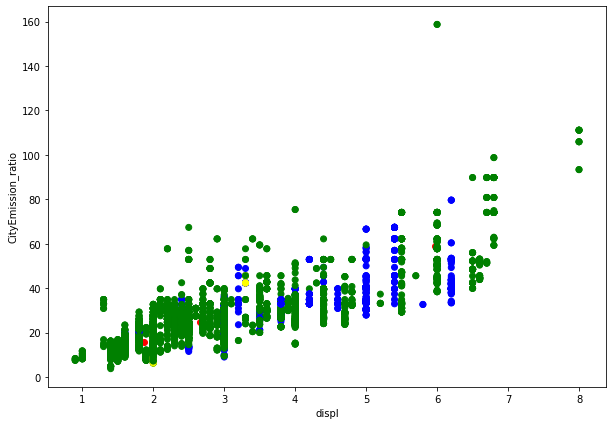

In [1260]:
fig_size = plt.rcParams["figure.figsize"]
 
fig_size[0] = 10
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size
fig, ax = plt.subplots()
plt.scatter(centroids['centroidx'], centroids['centroidy'], c='red') 
plt.xlabel('displ')
plt.ylabel('CityEmission_ratio')
ax.scatter(df4['displ'], df4['CityEmission_ratio'], c=ENGINETYPE_COLOR)
# 'C' OR COLOR CHANGED TO THE 'TYPE_COLOR' VARIABLE, WHICH CHANGES THE COLORS OF THE INDIVIDUAL POINTS REPRESENTING EACH BIRD TYPE TO IT'S RESPECTIVE COLOR


plt.show()

# Number of Cylinders vs Gallons per Year

In [1261]:
df6 = engtype[['displ','GallonsPerYear']].copy()
df6.head()

,displ,GallonsPerYear
4,2.2,728.611579
61,3.8,814.330588
62,3.8,769.090000
100,6.8,1258.510909
115,2.3,728.611579


In [1262]:
df6.isnull().sum()

displ             2
GallonsPerYear    0
dtype: int64

In [1263]:
df6 = df6.dropna().copy()
df6.isnull().sum()

displ             0
GallonsPerYear    0
dtype: int64

In [1264]:
scaler = StandardScaler()

scaler.fit(df6)
scaled_array = scaler.transform(df6)

print(df6.describe())
average = np.mean(scaled_array[:,0])
std = np.std(scaled_array[:,0])
print('\ndispl mean is {:.6f}.'.format(average))
print('displ  std is {:.6f}.'.format(std))
print('GallonsPerYear mean is {:.6f}.'.format(np.mean(scaled_array[:,1])))
print('GallonsPerYear standard deviation is {:.6f}.'.\
      format(np.std(scaled_array[:,1])))

             displ  GallonsPerYear
count  7760.000000     7760.000000
mean      2.817384      670.700475
std       1.247668      155.019614
min       0.900000      214.851113
25%       2.000000      568.394325
50%       2.400000      659.220000
75%       3.000000      728.611579
max       8.000000     1730.452500

displ mean is -0.000000.
displ  std is 1.000000.
GallonsPerYear mean is 0.000000.
GallonsPerYear standard deviation is 1.000000.


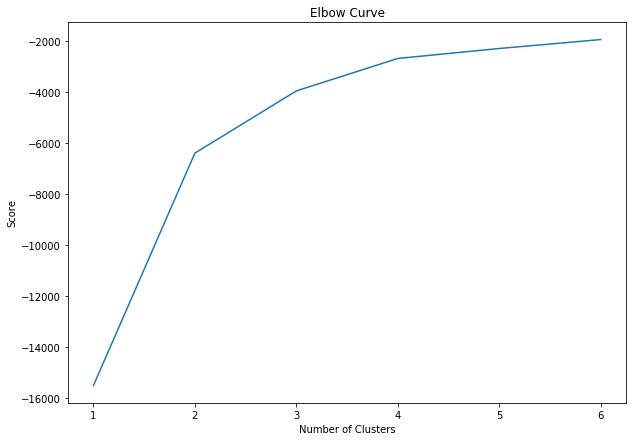

In [1265]:
df5 = scaled_array
no_clusters = 6


noClusters = range(1,no_clusters + 1)
kmeans = [KMeans(n_clusters = i) for i in noClusters] 
score = [kmeans[i].fit(df5).score(df5) for i in range(len(kmeans))]
plt.plot(noClusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel("Score")
plt.title('Elbow Curve')
plt.show()

In [1266]:
kmeans = KMeans(n_clusters = 3, \
            random_state = 42) # <-- use this number to get my result
kmeans = kmeans.fit(scaled_array)

In [1267]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [1268]:
unscaled = scaler.inverse_transform(kmeans.cluster_centers_)
unscaled

array([[  2.92674189, 710.8509886 ],
       [  5.45277778, 946.61774052],
       [  1.9079556 , 544.1123917 ]])

In [1269]:
centroids = pd.DataFrame({'centroidx':unscaled[:,0],\
            'centroidy':unscaled[:,1]})

In [1270]:
centroids.head()

,centroidx,centroidy
0,2.926742,710.850989
1,5.452778,946.617741
2,1.907956,544.112392


In [1271]:
df6['labels'] = kmeans.labels_.astype(np.int) # kmeans label_ generates the cluster numbers
df6.head() # look to see which cluster each row is assigned to

,displ,GallonsPerYear,labels
4,2.2,728.611579,0
61,3.8,814.330588,0
62,3.8,769.090000,0
100,6.8,1258.510909,1
115,2.3,728.611579,0


In [1272]:
df6['enginetype'] = engtype['enginetype'] # and the cereal name
df6['enginetype'] = df6['enginetype'].astype(str).str[0:6] # cut to six chars

df6.head()

,displ,GallonsPerYear,labels,enginetype
4,2.2,728.611579,0,Turbo
61,3.8,814.330588,0,Super
62,3.8,769.090000,0,Super
100,6.8,1258.510909,1,Turbo
115,2.3,728.611579,0,Turbo


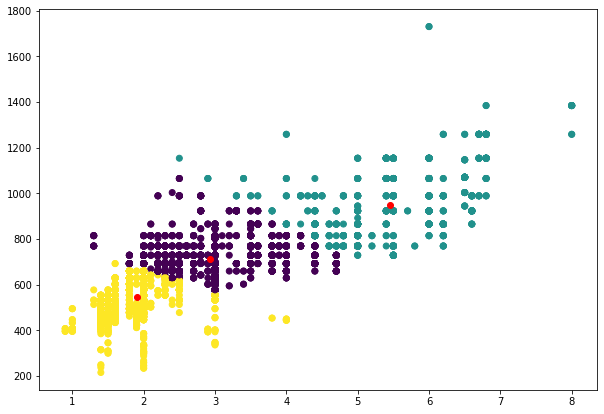

In [1273]:
plt.scatter(df6['displ'], df6['GallonsPerYear'], c=df6.labels) # (x,y,color)
plt.scatter(centroids['centroidx'], \
            centroids['centroidy'], c='red') # (x,y,color)

plt.show()

In [1274]:
ENGINETYPE_COLOR_MAP = {'Super' : 'Blue',
                   'Turbo' : 'Green' ,
                  'Twin' : 'Yellow',
                  
                 }
                  

ENGINETYPE_COLOR = [ENGINETYPE_COLOR_MAP[l] for l in df6.enginetype]

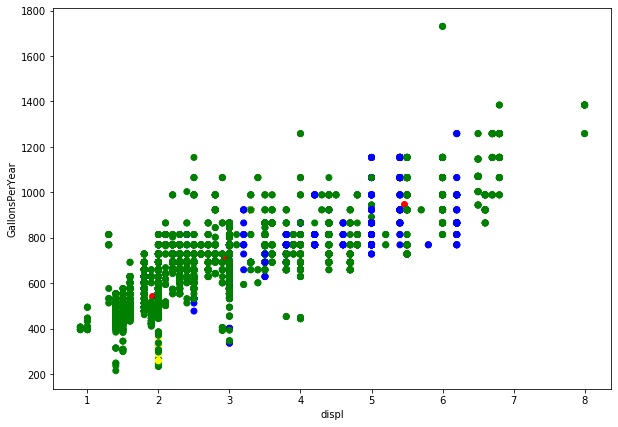

In [1275]:
fig_size = plt.rcParams["figure.figsize"]
 
fig_size[0] = 10
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size
fig, ax = plt.subplots()
plt.scatter(centroids['centroidx'], centroids['centroidy'], c='red') 
plt.xlabel('displ')
plt.ylabel('GallonsPerYear')
ax.scatter(df6['displ'], df6['GallonsPerYear'], c=ENGINETYPE_COLOR)
# 'C' OR COLOR CHANGED TO THE 'TYPE_COLOR' VARIABLE, WHICH CHANGES THE COLORS OF THE INDIVIDUAL POINTS REPRESENTING EACH BIRD TYPE TO IT'S RESPECTIVE COLOR


plt.show()

# Average MPG vs Average emissions per mile

In [1276]:
df8 = engtype[['avgmpg','avg_emissionratio']].copy()
df8.head()

,avgmpg,avg_emissionratio
4,20.0,23.925158
61,18.0,29.872269
62,18.5,27.678367
100,12.5,67.325758
115,19.5,24.387349


In [1277]:
df8.isnull().sum()

avgmpg               0
avg_emissionratio    0
dtype: int64

In [1278]:
scaler = StandardScaler()

scaler.fit(df8)
scaled_array = scaler.transform(df8)

print(df8.describe())
average = np.mean(scaled_array[:,0])
std = np.std(scaled_array[:,0])
print('\avgmpg mean is {:.6f}.'.format(average))
print('avgmpg  std is {:.6f}.'.format(std))
print('avg_emissionratio mean is {:.6f}.'.format(np.mean(scaled_array[:,1])))
print('avg_emissionratio standard deviation is {:.6f}.'.\
      format(np.std(scaled_array[:,1])))

            avgmpg  avg_emissionratio
count  7762.000000        7762.000000
mean     22.757730          21.431883
std       4.836279          10.705569
min       8.500000           3.547792
25%      19.500000          14.452496
50%      22.000000          19.600401
75%      25.500000          24.784969
max      45.000000         134.891964
vgmpg mean is -0.000000.
avgmpg  std is 1.000000.
avg_emissionratio mean is 0.000000.
avg_emissionratio standard deviation is 1.000000.


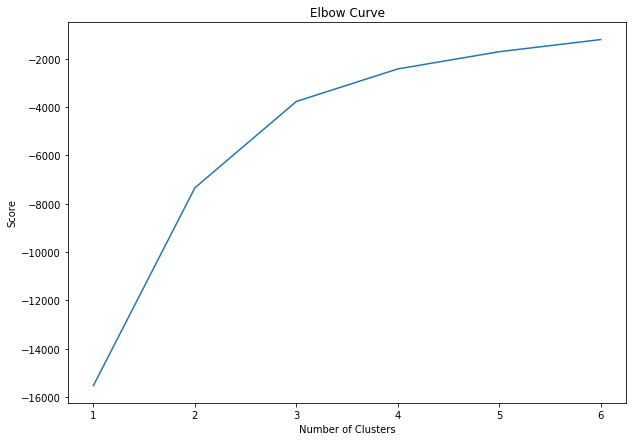

In [1279]:
df7 = scaled_array
no_clusters = 6


noClusters = range(1,no_clusters + 1)
kmeans = [KMeans(n_clusters = i) for i in noClusters] 
score = [kmeans[i].fit(df7).score(df7) for i in range(len(kmeans))]
plt.plot(noClusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel("Score")
plt.title('Elbow Curve')
plt.show()

In [1280]:
kmeans = KMeans(n_clusters = 4, \
            random_state = 42) # <-- use this number to get my result
kmeans = kmeans.fit(scaled_array)

In [1281]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [1282]:
unscaled = scaler.inverse_transform(kmeans.cluster_centers_)
unscaled

array([[23.85874745, 16.99871221],
       [14.13483146, 50.83542254],
       [30.12312415, 10.7770856 ],
       [19.41926346, 26.01513448]])

In [1283]:
centroids = pd.DataFrame({'centroidx':unscaled[:,0],\
            'centroidy':unscaled[:,1]})

In [1284]:
centroids.head()

,centroidx,centroidy
0,23.858747,16.998712
1,14.134831,50.835423
2,30.123124,10.777086
3,19.419263,26.015134


In [1285]:
df8['labels'] = kmeans.labels_.astype(np.int) # kmeans label_ generates the cluster numbers
df8.head() # look to see which cluster each row is assigned to

,avgmpg,avg_emissionratio,labels
4,20.0,23.925158,3
61,18.0,29.872269,3
62,18.5,27.678367,3
100,12.5,67.325758,1
115,19.5,24.387349,3


In [1286]:
df8['enginetype'] = engtype['enginetype'] # and the cereal name
df8['enginetype'] = df8['enginetype'].astype(str).str[0:6] # cut to six chars

df8.head()

,avgmpg,avg_emissionratio,labels,enginetype
4,20.0,23.925158,3,Turbo
61,18.0,29.872269,3,Super
62,18.5,27.678367,3,Super
100,12.5,67.325758,1,Turbo
115,19.5,24.387349,3,Turbo


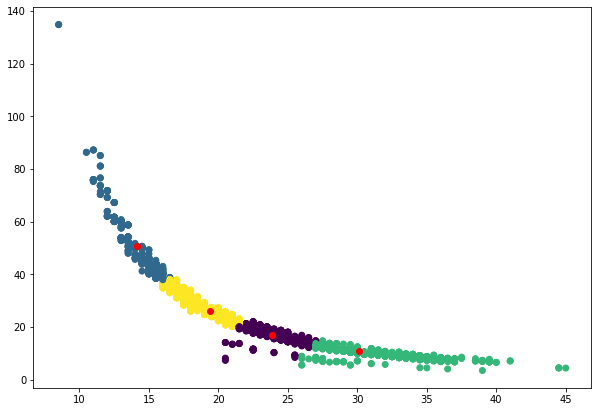

In [1287]:
plt.scatter(df8['avgmpg'], df8['avg_emissionratio'], c=df8.labels) # (x,y,color)
plt.scatter(centroids['centroidx'], \
            centroids['centroidy'], c='red') # (x,y,color)

plt.show()

In [1288]:
ENGINETYPE_COLOR_MAP = {'Super' : 'Blue',
                   'Turbo' : 'Green' , 
                  'Twin' : 'Yellow',
                  
                 }
                  

ENGINETYPE_COLOR = [ENGINETYPE_COLOR_MAP[l] for l in df8.enginetype]

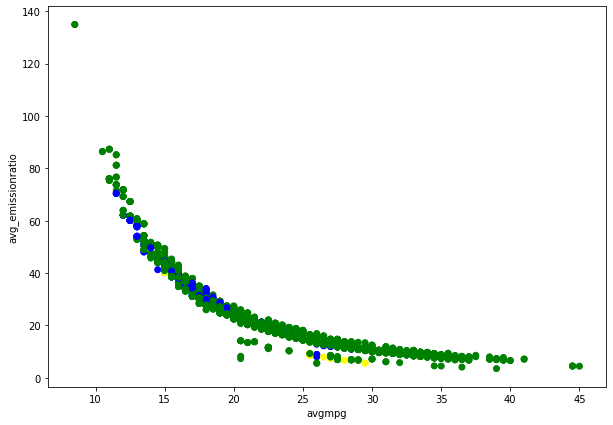

In [1289]:
fig_size = plt.rcParams["figure.figsize"]
 
fig_size[0] = 10
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size
fig, ax = plt.subplots()
plt.scatter(centroids['centroidx'], centroids['centroidy'], c='red') 
plt.xlabel('avgmpg')
plt.ylabel('avg_emissionratio')
ax.scatter(df8['avgmpg'], df8['avg_emissionratio'], c=ENGINETYPE_COLOR, alpha =1)
# 'C' OR COLOR CHANGED TO THE 'TYPE_COLOR' VARIABLE, WHICH CHANGES THE COLORS OF THE INDIVIDUAL POINTS REPRESENTING EACH BIRD TYPE TO IT'S RESPECTIVE COLOR


plt.show()

# Regression Analysis


In [1290]:
engtype.head()

,enginetype,city08,highway08,make,model,VClass,fuelType1,co2TailpipeGpm,displ,barrels08,cylinders,CityEmission_ratio,HighwayEmission_ratio,GallonsPerYear,avgmpg,avg_emissionratio
4,Turbo,17,23,Subaru,Legacy AWD Turbo,Compact Cars,Premium Gasoline,467.736842,2.2,17.347895,4.0,27.513932,20.336384,728.611579,20.0,23.925158
61,Super,15,21,Ford,Thunderbird,Midsize Cars,Premium Gasoline,522.764706,3.8,19.388824,6.0,34.850980,24.893557,814.330588,18.0,29.872269
62,Super,15,22,Ford,Thunderbird,Midsize Cars,Premium Gasoline,493.722222,3.8,18.311667,6.0,32.914815,22.441919,769.090000,18.5,27.678367
100,Turbo,10,15,Rolls-Royce,Turbo R/Turbo R(lwb),Midsize Cars,Premium Gasoline,807.909091,6.8,29.964545,8.0,80.790909,53.860606,1258.510909,12.5,67.325758
115,Turbo,17,22,Volvo,940,Midsize Cars,Regular Gasoline,467.736842,2.3,17.347895,4.0,27.513932,21.260766,728.611579,19.5,24.387349


In [1305]:
logengtype = engtype.copy()

In [1306]:
logengtype.loc[logengtype.enginetype == 'Super', 'supercharged'] = '1' 
logengtype.loc[logengtype.enginetype == 'Turbo', 'turbocharged'] = '1' 
logengtype.loc[logengtype.enginetype == 'Twin', 'twincharged'] = '1' 


,enginetype,city08,highway08,make,model,VClass,fuelType1,co2TailpipeGpm,displ,barrels08,cylinders,CityEmission_ratio,HighwayEmission_ratio,GallonsPerYear,avgmpg,avg_emissionratio,supercharged,turbocharged,twincharged
4,Turbo,17,23,Subaru,Legacy AWD Turbo,Compact Cars,Premium Gasoline,467.736842,2.2,17.347895,4.0,27.513932,20.336384,728.611579,20.0,23.925158,NaN,1,NaN
61,Super,15,21,Ford,Thunderbird,Midsize Cars,Premium Gasoline,522.764706,3.8,19.388824,6.0,34.850980,24.893557,814.330588,18.0,29.872269,1,NaN,NaN
62,Super,15,22,Ford,Thunderbird,Midsize Cars,Premium Gasoline,493.722222,3.8,18.311667,6.0,32.914815,22.441919,769.090000,18.5,27.678367,1,NaN,NaN
100,Turbo,10,15,Rolls-Royce,Turbo R/Turbo R(lwb),Midsize Cars,Premium Gasoline,807.909091,6.8,29.964545,8.0,80.790909,53.860606,1258.510909,12.5,67.325758,NaN,1,NaN
115,Turbo,17,22,Volvo,940,Midsize Cars,Regular Gasoline,467.736842,2.3,17.347895,4.0,27.513932,21.260766,728.611579,19.5,24.387349,NaN,1,NaN


In [1311]:
logengtype['supercharged'] = logengtype['supercharged'].fillna(0)
logengtype['turbocharged'] =  logengtype['turbocharged'].fillna(0)
logengtype['twincharged']  =  logengtype['twincharged'].fillna(0)

In [1318]:
logengtype.head()

,enginetype,city08,highway08,make,model,VClass,fuelType1,co2TailpipeGpm,displ,barrels08,cylinders,CityEmission_ratio,HighwayEmission_ratio,GallonsPerYear,avgmpg,avg_emissionratio,supercharged,turbocharged,twincharged
4,Turbo,17,23,Subaru,Legacy AWD Turbo,Compact Cars,Premium Gasoline,467.736842,2.2,17.347895,4.0,27.513932,20.336384,728.611579,20.0,23.925158,0,1,0
61,Super,15,21,Ford,Thunderbird,Midsize Cars,Premium Gasoline,522.764706,3.8,19.388824,6.0,34.850980,24.893557,814.330588,18.0,29.872269,1,0,0
62,Super,15,22,Ford,Thunderbird,Midsize Cars,Premium Gasoline,493.722222,3.8,18.311667,6.0,32.914815,22.441919,769.090000,18.5,27.678367,1,0,0
100,Turbo,10,15,Rolls-Royce,Turbo R/Turbo R(lwb),Midsize Cars,Premium Gasoline,807.909091,6.8,29.964545,8.0,80.790909,53.860606,1258.510909,12.5,67.325758,0,1,0
115,Turbo,17,22,Volvo,940,Midsize Cars,Regular Gasoline,467.736842,2.3,17.347895,4.0,27.513932,21.260766,728.611579,19.5,24.387349,0,1,0


In [1389]:
X = logengtype[['avg_emissionratio', 'CityEmission_ratio', 'HighwayEmission_ratio', 'co2TailpipeGpm' ]].copy()
Y = logengtype['avgmpg'].copy()



In [1411]:
dummy = pd.get_dummies(logengtype['enginetype'])
dummy.head()


,Super,Turbo,Twin
4,0,1,0
61,1,0,0
62,1,0,0
100,0,1,0
115,0,1,0


In [1412]:
logengtype = pd.concat([logengtype, dummy], axis=1)
logengtype.head()

,enginetype,city08,highway08,make,model,VClass,fuelType1,co2TailpipeGpm,displ,barrels08,...,twincharged,Super,Turbo,Twin,Super,Turbo,Twin,Super,Turbo,Twin
4,Turbo,17,23,Subaru,Legacy AWD Turbo,Compact Cars,Premium Gasoline,467.736842,2.2,17.347895,...,0,0,1,0,0,1,0,0,1,0
61,Super,15,21,Ford,Thunderbird,Midsize Cars,Premium Gasoline,522.764706,3.8,19.388824,...,0,1,0,0,1,0,0,1,0,0
62,Super,15,22,Ford,Thunderbird,Midsize Cars,Premium Gasoline,493.722222,3.8,18.311667,...,0,1,0,0,1,0,0,1,0,0
100,Turbo,10,15,Rolls-Royce,Turbo R/Turbo R(lwb),Midsize Cars,Premium Gasoline,807.909091,6.8,29.964545,...,0,0,1,0,0,1,0,0,1,0
115,Turbo,17,22,Volvo,940,Midsize Cars,Regular Gasoline,467.736842,2.3,17.347895,...,0,0,1,0,0,1,0,0,1,0


In [1410]:
logengtype2 = logengtype.drop(columns =['supercharged', 'turbocharged', 'twincharged'])
logengtype2 = logengtype.drop(columns =['Super', 'Turbo', 'Twin'])
logengtype2.head()

,enginetype,city08,highway08,make,model,VClass,fuelType1,co2TailpipeGpm,displ,barrels08,cylinders,CityEmission_ratio,HighwayEmission_ratio,GallonsPerYear,avgmpg,avg_emissionratio,supercharged,turbocharged,twincharged
4,Turbo,17,23,Subaru,Legacy AWD Turbo,Compact Cars,Premium Gasoline,467.736842,2.2,17.347895,4.0,27.513932,20.336384,728.611579,20.0,23.925158,0,1,0
61,Super,15,21,Ford,Thunderbird,Midsize Cars,Premium Gasoline,522.764706,3.8,19.388824,6.0,34.850980,24.893557,814.330588,18.0,29.872269,1,0,0
62,Super,15,22,Ford,Thunderbird,Midsize Cars,Premium Gasoline,493.722222,3.8,18.311667,6.0,32.914815,22.441919,769.090000,18.5,27.678367,1,0,0
100,Turbo,10,15,Rolls-Royce,Turbo R/Turbo R(lwb),Midsize Cars,Premium Gasoline,807.909091,6.8,29.964545,8.0,80.790909,53.860606,1258.510909,12.5,67.325758,0,1,0
115,Turbo,17,22,Volvo,940,Midsize Cars,Regular Gasoline,467.736842,2.3,17.347895,4.0,27.513932,21.260766,728.611579,19.5,24.387349,0,1,0


In [1418]:
# Run regression using statsmodels
import statsmodels.api as sm

est = sm.OLS(Y,X).fit() # fit model
predictions = est.predict() # get predicted values
errors = abs(Y - predictions) # find the deviation from the predicted values
avgError = errors.mean() # what is the average error?
print(est.summary())
print("\nAverage error level: {:.2f}.".format(avgError))

                                 OLS Regression Results                                
Dep. Variable:                 avgmpg   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                          6.421e+04
Date:                Wed, 06 Nov 2019   Prob (F-statistic):                        0.00
Time:                        20:48:44   Log-Likelihood:                         -22822.
No. Observations:                7762   AIC:                                  4.565e+04
Df Residuals:                    7759   BIC:                                  4.567e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------